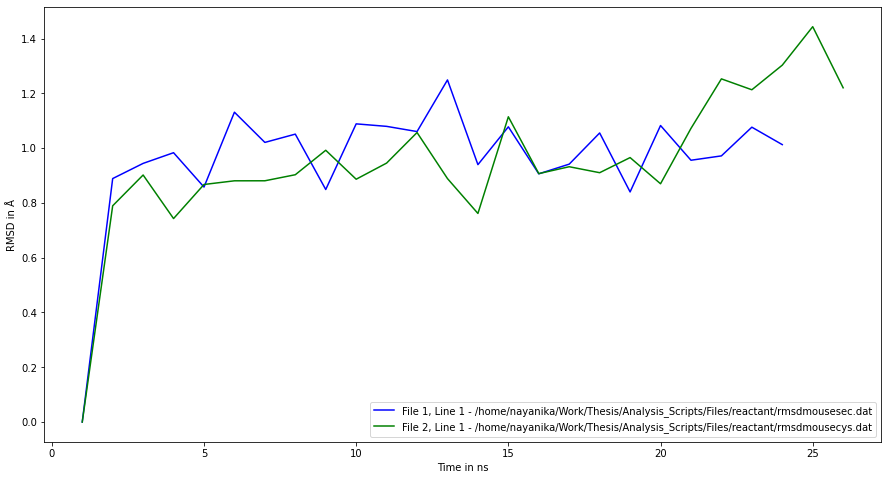

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches

# Specify the pattern for .dat files
file_pattern = '/home/nayanika/Work/Thesis/Analysis_Scripts/Files/reactant/rmsdmouse*.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Define a list of RGB tuples for colors
#colors = ['red','blue', 'green','purple']
colors = ['blue', 'green']

# Plot each file with a different color
for file_index, (file_path, color) in enumerate(zip(file_list, colors), start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Assuming the first column is x-axis data
    x_values = data[:, 0]

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a different color
    for line_index, y_values in enumerate(y_values_list.T, start=1):
        ax.plot(x_values, y_values, label=f'File {file_index}, Line {line_index} - {file_path}', color=color)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Add legend with custom location
ax.legend(loc='lower right')

plt.show()

#make the python stript as follows - md steps vs rmsd and frames vs rmsd 

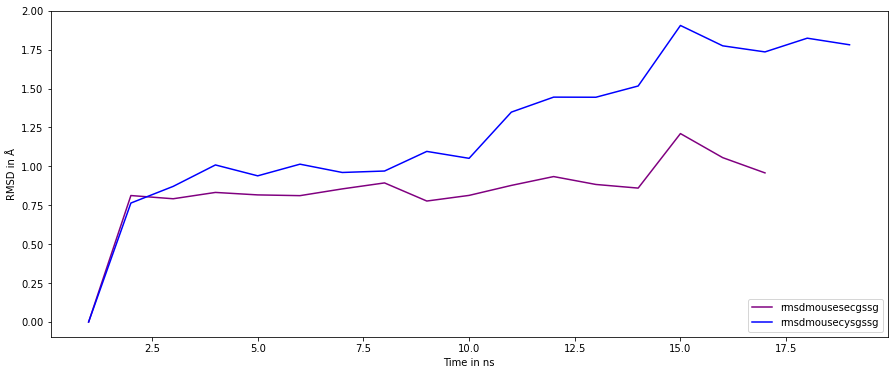

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import glob

def read_rmsd_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read()

    # Load data into a DataFrame
    df = pd.read_csv(StringIO(data), delim_whitespace=True)
    return df

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 6))

# Use glob to get a list of files matching the pattern
file_pattern = '/home/nayanika/Work/Thesis/Analysis_Scripts/Files/GSSG/rmsdhuman*.dat'
file_paths = glob.glob(file_pattern)

# Define a list of RGB tuples for colors
colors = ['purple','blue']

for file_path, color in zip(file_paths, colors):
    # Extract file name from the path
    file_name = file_path.split('/')[-1].split('.')[0]
    
    # Read data and plot
    df = read_rmsd_file(file_path)
    ax.plot(df['#Frame'], df['RMSD_00002'], label=f'{file_name}', linestyle='-', color=color)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Add legend with custom location
ax.legend(loc='lower right')

plt.show()

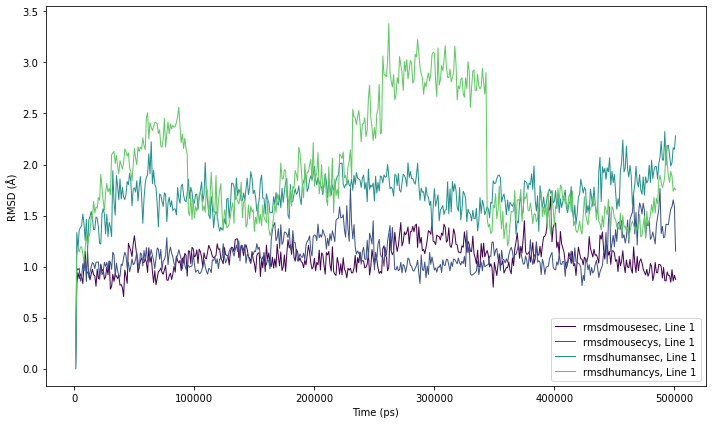

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.colors import LinearSegmentedColormap

# Specify the pattern for .dat files
file_pattern = '/home/nayanika/github/Thesis/Simulation/cpptraj_scripts/Files/rmsd*.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Create a gradient colormap
cmap = plt.get_cmap('viridis')

# Normalize colormap to the number of files
norm = plt.Normalize(0, len(file_list))

# Lists to store handles and labels for legend
handles = []
labels = []

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each file with a gradient color
for file_index, file_path in enumerate(file_list, start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Extract file name from the path
    file_name = file_path.split('/')[-1].split('.')[0]

    # Assuming the first column is x-axis data
    x_values_ns = data[:, 0]
    
    # Convert x-axis values to picoseconds
    x_values_ps = x_values_ns * 1000

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a gradient color
    for line_index, y_values in enumerate(y_values_list.T, start=1):
        line_label = f'{file_name}, Line {line_index}'
        color = cmap(norm(file_index - 1))  # Use normalized index for gradient
        line, = ax.plot(x_values_ps, y_values, label=line_label, color=color, linestyle='-', linewidth=1)
        handles.append(line)
        labels.append(line_label)

# Add labels
ax.set_xlabel('Time (ps)')
ax.set_ylabel('RMSD (Å)')

# Add legend with custom location
ax.legend(handles=handles, labels=labels, loc='lower right')

# Set a tight layout
plt.tight_layout()

plt.show()

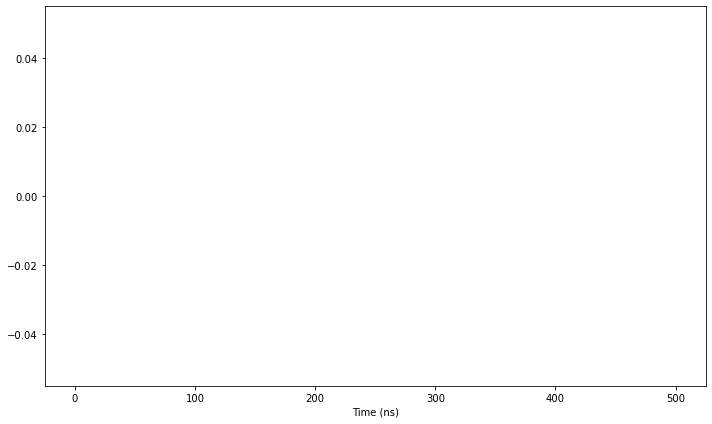

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation parameters
time_per_frame_ns = 5
total_simulation_time_ns = 500
total_frames = int(total_simulation_time_ns / time_per_frame_ns)

# Convert frames to picoseconds
time_per_frame_ps = time_per_frame_ns * 1000
time_in_picoseconds = np.linspace(0, total_simulation_time_ns, total_frames)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a dummy line to create x-axis only
ax.plot(time_in_picoseconds, np.zeros_like(time_in_picoseconds), label='', linestyle='', linewidth=0)

# Add labels
ax.set_xlabel('Time (ns)')

# Set a tight layout
plt.tight_layout()

plt.show()

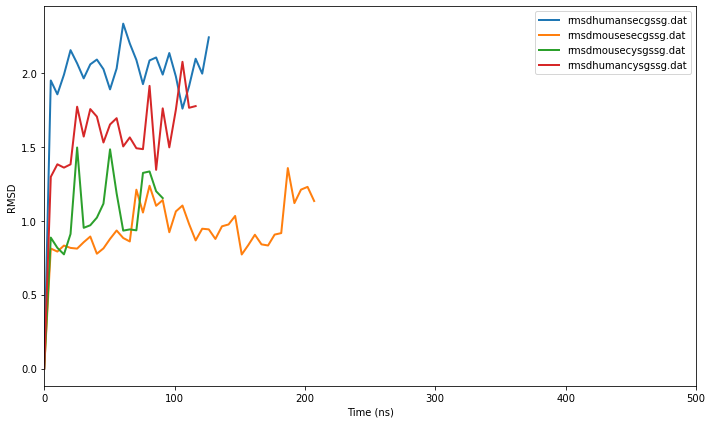

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Simulation parameters
total_simulation_time_ns = 500
total_frames = 100  # Assuming 100 frames for demonstration

# Convert frames to picoseconds
time_in_picoseconds = np.linspace(0, total_simulation_time_ns, total_frames)

# Directory containing RMSD files
directory_path = '/home/nayanika/github/Thesis/Simulation/cpptraj_scripts/Files/GSSG/'

# List to store data for each file
file_data = []

# Iterate through files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat') and filename.startswith('rmsd'):  # Only read files with '.dat' suffix and start with 'rmsd'
        file_path = os.path.join(directory_path, filename)
        rmsd_values = []

        with open(file_path, 'r') as file:
            for line in file:
                if not line.startswith('#'):
                    try:
                        rmsd_values.append(float(line.strip().split()[1]))  # Assuming the RMSD values are in the second column
                    except ValueError:
                        print(f"Skipping line in {filename}: {line}")

        # Ensure the lengths match by using the minimum length
        min_length = min(len(time_in_picoseconds), len(rmsd_values))
        # Append data to the file_data list
        file_data.append({'filename': filename, 'time_in_picoseconds': time_in_picoseconds[:min_length], 'rmsd_values': rmsd_values[:min_length]})

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot RMSD for each file and add legend
for data in file_data:
    ax.plot(data['time_in_picoseconds'], data['rmsd_values'], label=data['filename'], linestyle='-', linewidth=2)

# Add labels
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD')

# Set x-axis limit to 500 ns
ax.set_xlim(0, total_simulation_time_ns)

# Add legend
ax.legend()

# Set a tight layout
plt.tight_layout()

plt.show()

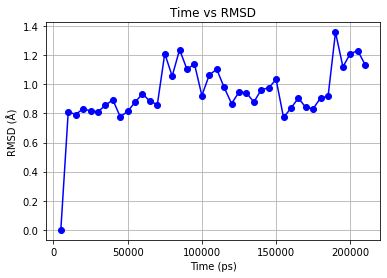

In [11]:
import matplotlib.pyplot as plt

# Your provided data
data = """
#Frame     RMSD_00002
1       0.0000
2       0.8124
3       0.7917
4       0.8324
5       0.8165
6       0.8117
7       0.8551
8       0.8935
9       0.7771
10       0.8133
11       0.8775
12       0.9343
13       0.8836
14       0.8602
15       1.2105
16       1.0559
17       1.2373
18       1.1016
19       1.1401
20       0.9226
21       1.0636
22       1.1032
23       0.9787
24       0.8672
25       0.9464
26       0.9420
27       0.8771
28       0.9627
29       0.9752
30       1.0329
31       0.7720
32       0.8358
33       0.9056
34       0.8405
35       0.8329
36       0.9067
37       0.9167
38       1.3571
39       1.1197
40       1.2109
41       1.2296
42       1.1338
"""

# Convert the string data to a list of lists
lines = data.strip().split('\n')[1:]
frame_rmsd_data = [list(map(float, line.split())) for line in lines]

# Extract data for plotting
frames, rmsd_values = zip(*frame_rmsd_data)

# Calculate time in picoseconds
time_per_frame_ns = 5
time_step_fs = 0.002
time_per_frame_ps = time_per_frame_ns * 1000
time_in_picoseconds = [frame * time_per_frame_ps + step * time_step_fs for frame, step in zip(frames, rmsd_values)]

# Plotting
plt.plot(time_in_picoseconds, rmsd_values, marker='o', linestyle='-', color='b')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Å)')
plt.title('Time vs RMSD')
plt.grid(True)
plt.show()